In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date & Time Handling
from datetime import datetime

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Visualization Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# File Paths (Constants)
ORDERS_FILE = "food_delivery_data/orders.csv"
USERS_FILE = "food_delivery_data/users.json"
RESTAURANTS_FILE = "food_delivery_data/restaurants.sql"

# Business Constants
HIGH_VALUE_THRESHOLD = 1000
GOLD_MEMBERSHIP = "Gold"

from IPython.display import Markdown, display


## Step 1: Load Orders Data (CSV)

This dataset contains transactional-level information for each order, including:
- Order identifiers
- User and restaurant mappings
- Order date
- Total order amount

This data forms the **base table** for all subsequent joins.

In [2]:
# Load orders data
orders_df = pd.read_csv(ORDERS_FILE)

# Preview data
orders_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,"1,155.97",Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,"1,321.91",Royal Eatery South Indian


In [3]:
# Check shape and schema
print(f"Orders Dataset Shape: {orders_df.shape}")
orders_df.info()

Orders Dataset Shape: (10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [4]:
# Convert order_date to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Check for missing values
orders_df.isnull().sum()

/tmp/ipython-input-692316922.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])


,0
order_id,0
user_id,0
restaurant_id,0
order_date,0
total_amount,0
restaurant_name,0


In [5]:
# Basic statistics for monetary column
orders_df['total_amount'].describe()

,total_amount
count,"10,000.00"
mean,801.16
std,405.46
min,100.20
25%,446.31
50%,806.30
75%,"1,149.23"
max,"1,499.83"


## Step 2: Load Users Data (JSON)

This dataset contains user-level master information including:
- User identity
- City
- Membership type (Gold / Regular)

This data is used to analyze:
- Gold vs Regular user behavior
- City-wise performance

In [6]:
# Load users data
users_df = pd.read_json(USERS_FILE)

# Preview data
users_df.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [7]:
# Check structure and data types
print(f"Users Dataset Shape: {users_df.shape}")
users_df.info()

Users Dataset Shape: (3000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [8]:
# Membership distribution
users_df['membership'].value_counts()

,count
membership,
Regular,1521
Gold,1479


In [9]:
# City distribution
users_df['city'].value_counts()

,count
city,
Bangalore,799
Chennai,758
Pune,734
Hyderabad,709


In [10]:
users_df.isnull().sum()

,0
user_id,0
name,0
city,0
membership,0


## Step 3: Load Restaurant Data (SQL)

This dataset contains restaurant-level master information including:
- Restaurant identity
- Cuisine type
- Restaurant rating

This data enables:
- Cuisine-wise performance analysis
- Rating vs revenue insights

In [11]:
import sqlite3

# Create in-memory SQLite database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Read and execute SQL file
with open(RESTAURANTS_FILE, 'r') as file:
    sql_script = file.read()

cursor.executescript(sql_script)

# Load restaurant table into DataFrame
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)

# Preview data
restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.80
1,2,Restaurant_2,Indian,4.10
2,3,Restaurant_3,Mexican,4.30
3,4,Restaurant_4,Chinese,4.10
4,5,Restaurant_5,Chinese,4.80


In [12]:
print(f"Restaurants Dataset Shape: {restaurants_df.shape}")
restaurants_df.info()

Restaurants Dataset Shape: (500, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [13]:
# Cuisine distribution
restaurants_df['cuisine'].value_counts()

,count
cuisine,
Mexican,128
Indian,126
Italian,126
Chinese,120


In [14]:
# Rating distribution
restaurants_df['rating'].describe()

,rating
count,500.00
mean,4.04
std,0.60
min,3.00
25%,3.50
50%,4.10
75%,4.60
max,5.00


In [15]:
restaurants_df.isnull().sum()

,0
restaurant_id,0
restaurant_name,0
cuisine,0
rating,0


## Step 4: Merge Datasets

We merge all datasets using **left joins** to ensure that:
- All orders are retained
- Missing user or restaurant records do not drop transactions

### Join Keys:
- orders.user_id → users.user_id
- orders.restaurant_id → restaurants.restaurant_id

In [16]:
# Merge orders with users (Left Join)
orders_users_df = orders_df.merge(
    users_df,
    on='user_id',
    how='left'
)

orders_users_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,2023-10-04,"1,155.97",Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,2023-12-25,"1,321.91",Royal Eatery South Indian,User_1064,Pune,Regular


In [17]:
# Merge with restaurant data (Left Join)
final_df = orders_users_df.merge(
    restaurants_df,
    on='restaurant_id',
    how='left'
)

final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.20
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.50
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.00
3,4,319,224,2023-10-04,"1,155.97",Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.80
4,5,1064,293,2023-12-25,"1,321.91",Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.00


In [18]:
# Shape of final dataset
print(f"Final Dataset Shape: {final_df.shape}")

# Check for unexpected nulls in key columns
final_df[['order_id', 'user_id', 'restaurant_id']].isnull().sum()

Final Dataset Shape: (10000, 12)


,0
order_id,0
user_id,0
restaurant_id,0


In [19]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [20]:
# Save final dataset
final_df.to_csv("food_delivery_data/final_food_delivery_dataset.csv", index=False)

## Q1. City with Highest Revenue from Gold Members

This analysis focuses exclusively on users with **Gold membership** and computes
the total revenue generated in each city.

In [21]:
# Filter Gold member orders
gold_orders_df = final_df[final_df['membership'] == GOLD_MEMBERSHIP]

In [22]:
# Total revenue by city (Gold members only)
gold_city_revenue = (
    gold_orders_df
    .groupby('city')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue

,total_amount
city,
Chennai,"1,080,909.79"
Pune,"1,003,012.32"
Bangalore,"994,702.59"
Hyderabad,"896,740.19"


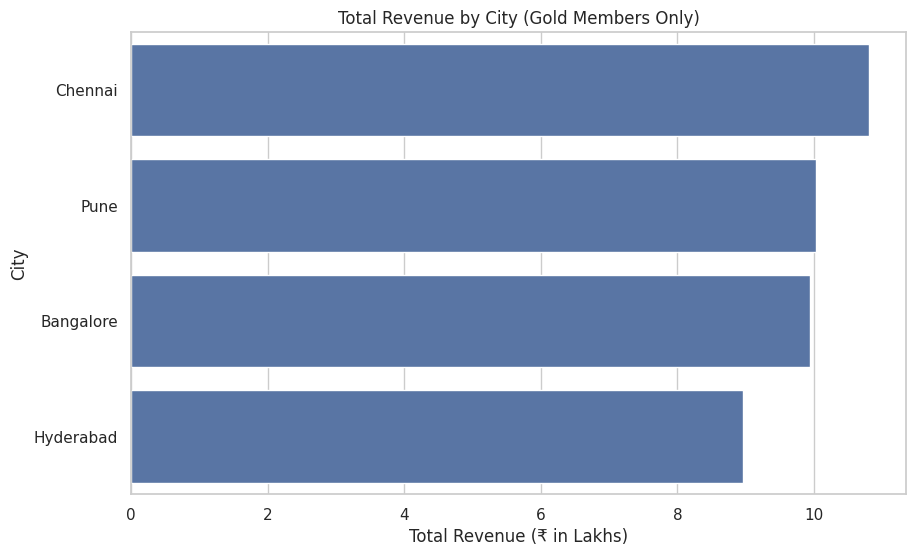

In [23]:
# Convert revenue to Lakhs
gold_city_revenue_lakhs = gold_city_revenue / 1e5

# Plot
sns.barplot(
    x=gold_city_revenue_lakhs.values,
    y=gold_city_revenue_lakhs.index
)

plt.title("Total Revenue by City (Gold Members Only)")
plt.xlabel("Total Revenue (₹ in Lakhs)")
plt.ylabel("City")

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [24]:
display(Markdown(f"""### Answer
The city with the highest total revenue from Gold members is: **{gold_city_revenue.idxmax()}**"""))

### Answer
The city with the highest total revenue from Gold members is: **Chennai**

## Q2. Cuisine with the Highest Average Order Value

This analysis calculates the **average order value (AOV)** for each cuisine
across all orders to identify premium-performing cuisines.

In [25]:
# Average order value by cuisine
cuisine_aov = (
    final_df
    .groupby('cuisine')['total_amount']
    .mean()
    .sort_values(ascending=False)
)

cuisine_aov

,total_amount
cuisine,
Mexican,808.02
Italian,799.45
Indian,798.47
Chinese,798.39


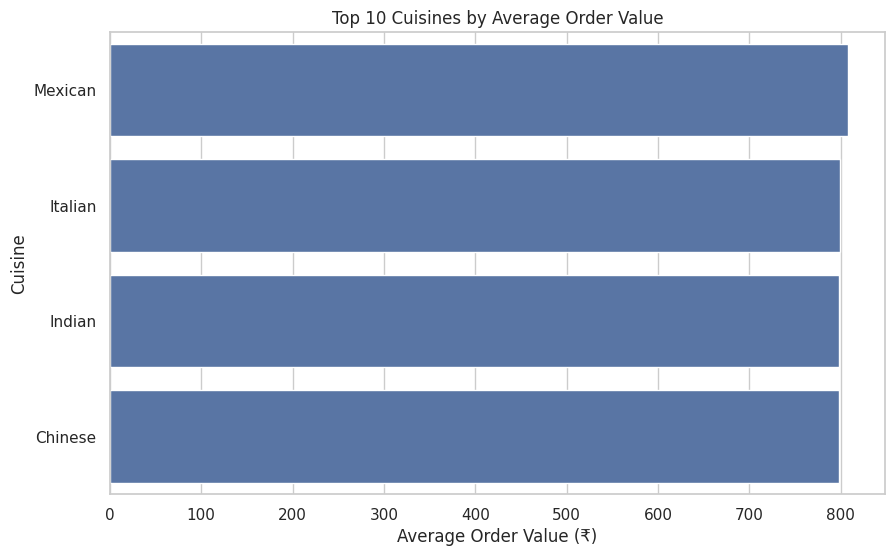

In [26]:
# Select top 10 cuisines by AOV
top_cuisine_aov = cuisine_aov.head(10)

sns.barplot(
    x=top_cuisine_aov.values,
    y=top_cuisine_aov.index
)

plt.title("Top 10 Cuisines by Average Order Value")
plt.xlabel("Average Order Value (₹)")
plt.ylabel("Cuisine")

# Remove scientific notation if any
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [27]:
display(Markdown(f"""
### Answer
The cuisine with the highest average order value is: **{cuisine_aov.idxmax()}** with an average order value of **₹{cuisine_aov.max():.2f}**"""))


### Answer
The cuisine with the highest average order value is: **Mexican** with an average order value of **₹808.02**

## Q3. Distinct Users with Total Spend > ₹1000

We aggregate total spending per user and count how many users have cumulatively spent more than ₹1000.

In [28]:
# Total spend per user
user_total_spend = final_df.groupby('user_id')['total_amount'].sum()

# Users who spent more than ₹1000
high_value_users = user_total_spend[user_total_spend > HIGH_VALUE_THRESHOLD]

# Count of distinct users
num_high_value_users = high_value_users.shape[0]
num_high_value_users

2544

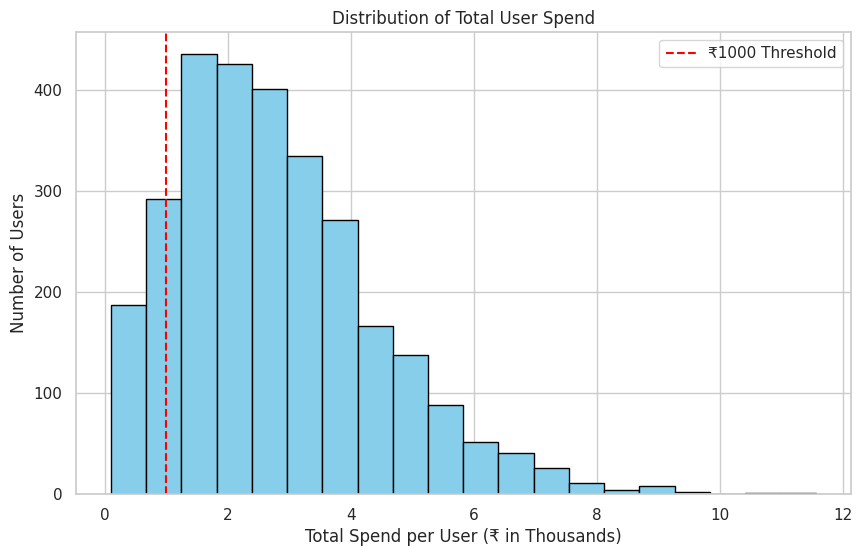

In [29]:
# Histogram of total user spend
plt.hist(user_total_spend/1000, bins=20, color='skyblue', edgecolor='black')
plt.axvline(HIGH_VALUE_THRESHOLD/1000, color='red', linestyle='--', label='₹1000 Threshold')
plt.title("Distribution of Total User Spend")
plt.xlabel("Total Spend per User (₹ in Thousands)")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

In [30]:
display(Markdown(f"""
### Answer
Number of distinct users whose total spend exceeds ₹1000: **{num_high_value_users}**"""))


### Answer
Number of distinct users whose total spend exceeds ₹1000: **2544**

## Q4. Restaurant Rating Range vs Total Revenue

In this analysis, restaurant ratings are grouped into meaningful ranges (bins),
and total revenue is calculated for each range to identify which quality segment
drives the most revenue.

In [31]:
# Define rating bins
rating_bins = [0, 3.0, 3.5, 4.0, 4.5, 5.0]
rating_labels = ['< 3.0', '3.1 - 3.5', '3.6 – 4.0', '4.1 – 4.5', '4.6 – 5.0']

# Create rating range column
final_df['rating_range'] = pd.cut(
    final_df['rating'],
    bins=rating_bins,
    labels=rating_labels,
    include_lowest=True
)

In [32]:
# Total revenue by rating range
rating_revenue = (
    final_df
    .groupby('rating_range')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

rating_revenue

/tmp/ipython-input-457661812.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating_range')['total_amount']


,total_amount
rating_range,
4.6 – 5.0,"2,197,030.75"
4.1 – 4.5,"1,960,326.26"
3.1 - 3.5,"1,881,754.57"
3.6 – 4.0,"1,717,494.41"
< 3.0,"255,018.13"


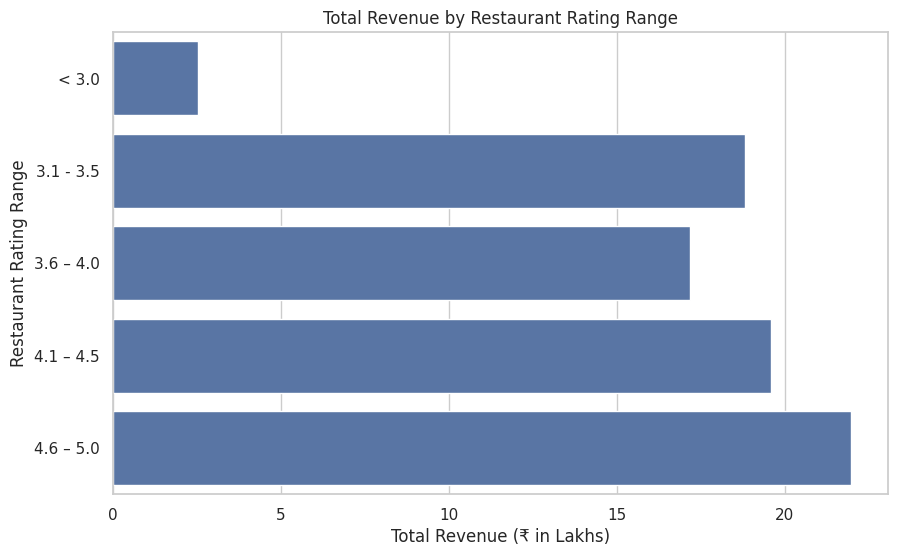

In [33]:
# Convert revenue to Lakhs
rating_revenue_lakhs = rating_revenue / 1e5

sns.barplot(
    x=rating_revenue_lakhs.values,
    y=rating_revenue_lakhs.index
)

plt.title("Total Revenue by Restaurant Rating Range")
plt.xlabel("Total Revenue (₹ in Lakhs)")
plt.ylabel("Restaurant Rating Range")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [34]:
display(Markdown(f"""
### Answer
The restaurant rating range generating the highest total revenue is: **{rating_revenue.idxmax()}**
"""))


### Answer
The restaurant rating range generating the highest total revenue is: **4.6 – 5.0**


## Q5. Highest Average Order Value (AOV) City Among Gold Members

This analysis evaluates spending behavior of Gold members by computing
the **average order value per city**.

In [35]:
# Average order value by city for Gold members
gold_city_aov = (
    gold_orders_df
    .groupby('city')['total_amount']
    .mean()
    .sort_values(ascending=False)
)

gold_city_aov

,total_amount
city,
Chennai,808.46
Hyderabad,806.42
Bangalore,793.22
Pune,781.16


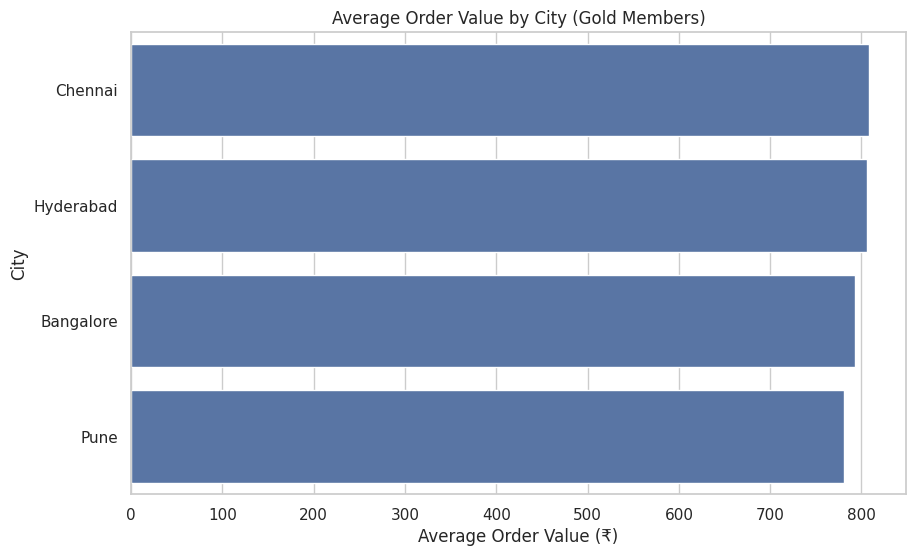

In [36]:
sns.barplot(
    x=gold_city_aov.values,
    y=gold_city_aov.index
)

plt.title("Average Order Value by City (Gold Members)")
plt.xlabel("Average Order Value (₹)")
plt.ylabel("City")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [37]:
display(Markdown(f"""
### Answer
Among Gold members, the city with the highest average order value is: **{gold_city_aov.idxmax()}**
"""))


### Answer
Among Gold members, the city with the highest average order value is: **Chennai**


## Q6. High-Impact Cuisine with Few Restaurants

This analysis identifies cuisines that:
- Have a **low number of distinct restaurants**
- Still generate **high total revenue**

These cuisines represent high-efficiency opportunities.

In [38]:
# Distinct restaurant count per cuisine
cuisine_restaurant_count = final_df.groupby('cuisine')['restaurant_id'].nunique()

# Total revenue per cuisine
cuisine_revenue = final_df.groupby('cuisine')['total_amount'].sum()

# Combine into single DataFrame
cuisine_impact_df = pd.DataFrame({
    'restaurant_count': cuisine_restaurant_count,
    'total_revenue': cuisine_revenue
})

# Efficiency score = revenue per restaurant
cuisine_impact_df['efficiency_score'] = (
    cuisine_impact_df['total_revenue'] / cuisine_impact_df['restaurant_count']
)

# Sort by efficiency (highest first)
cuisine_impact_df = cuisine_impact_df.sort_values(by='efficiency_score', ascending=False)

print(cuisine_impact_df)

         restaurant_count  total_revenue  efficiency_score
cuisine                                                   
Mexican               128   2,085,503.09         16,292.99
Chinese               120   1,930,504.65         16,087.54
Italian               126   2,024,203.80         16,065.11
Indian                126   1,971,412.58         15,646.13


In [39]:
display(Markdown(f"""
### Answer
Cuisines with very few restaurants yet strong revenue contribution is: **{cuisine_impact_df.index[0]}**
"""))


### Answer
Cuisines with very few restaurants yet strong revenue contribution is: **Mexican**


## Q7. Percentage of Orders Placed by Gold Members

This analysis measures the contribution of Gold members
to overall order volume.

In [40]:
# Total orders
total_orders = final_df['order_id'].nunique()

# Gold member orders
gold_orders_count = gold_orders_df['order_id'].nunique()

# Percentage calculation
gold_order_percentage = round((gold_orders_count / total_orders) * 100)

gold_order_percentage

50

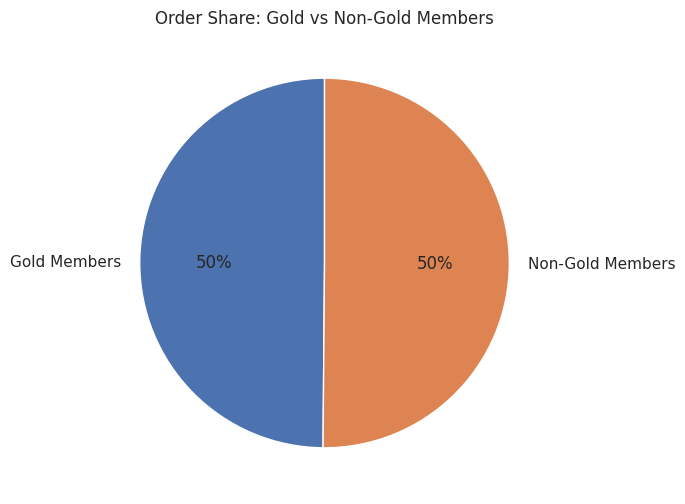

In [41]:
plt.pie(
    [gold_orders_count, total_orders - gold_orders_count],
    labels=['Gold Members', 'Non-Gold Members'],
    autopct='%1.0f%%',
    startangle=90
)

plt.title("Order Share: Gold vs Non-Gold Members")
plt.show()

In [42]:
display(Markdown(f"""
### Answer
Approximately **{gold_order_percentage}%** of total orders were placed by Gold members.
"""))


### Answer
Approximately **50%** of total orders were placed by Gold members.


## Q8. High Average Order Value Restaurants with Low Order Volume

This analysis identifies restaurants that:
- Have **fewer than 20 total orders**
- Yet achieve a **high average order value**

These restaurants represent premium or niche players.

In [43]:
# Orders count and AOV per restaurant
restaurant_metrics = (
    final_df
    .groupby(['restaurant_id', 'restaurant_name_x'])
    .agg(
        total_orders=('order_id', 'nunique'),
        avg_order_value=('total_amount', 'mean')
    )
)

# Filter restaurants with fewer than 20 orders
low_volume_restaurants = restaurant_metrics[restaurant_metrics['total_orders'] < 20]

# Sort by highest average order value
top_low_volume_restaurant = low_volume_restaurants.sort_values(
    by='avg_order_value',
    ascending=False
).head(10)

top_low_volume_restaurant

,,total_orders,avg_order_value
restaurant_id,restaurant_name_x,,
294,Hotel Dhaba Multicuisine,13,"1,040.22"
262,Hotel Cafe Punjabi,18,"1,029.47"
77,Sri Mess Punjabi,12,"1,029.18"
193,Swagath Eatery Multicuisine,15,"1,026.31"
7,Ruchi Biryani Punjabi,16,"1,002.14"
298,Swagath Foods Andhra,15,989.82
56,Sri Delights Pure Veg,18,989.47
135,Amma Eatery Non-Veg,18,988.70
343,Sai Cafe Andhra,17,986.03


In [44]:
display(Markdown(f"""
### Answer
The restaurant with the highest average order value and fewer than 20 orders is: **{top_low_volume_restaurant.index[0][1]}**<br>

**NOTE: Answer not available in options.**
"""))


### Answer
The restaurant with the highest average order value and fewer than 20 orders is: **Hotel Dhaba Multicuisine**<br>

**NOTE: Answer not available in options.**


## Q9. Highest Revenue Combination (City × Cuisine)

This analysis evaluates which **city–cuisine combination**
contributes the most to total revenue.

In [45]:
# Total revenue by city and cuisine
membership_cuisine_revenue = (
    final_df
    .groupby(['membership', 'cuisine'])['total_amount']
    .sum()
    .sort_values(ascending=False)
)

membership_cuisine_revenue.head()

membership  cuisine
Regular     Mexican   1,072,943.30
            Italian   1,018,424.75
Gold        Mexican   1,012,559.79
            Italian   1,005,779.05
Regular     Indian      992,100.27
Name: total_amount, dtype: float64

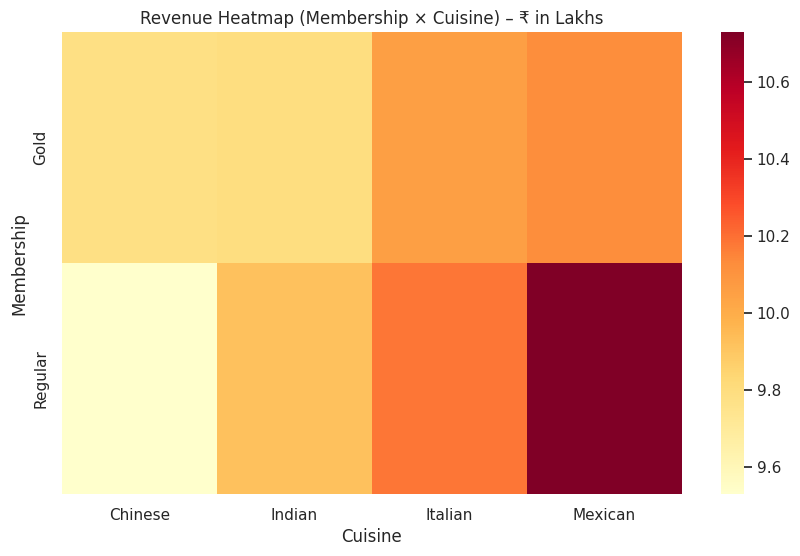

In [46]:
# Pivot for heatmap
heatmap_data = final_df.pivot_table(
    index='membership',
    columns='cuisine',
    values='total_amount',
    aggfunc='sum'
) / 1e5  # Convert to Lakhs

sns.heatmap(
    heatmap_data,
    cmap='YlOrRd'
)

plt.title("Revenue Heatmap (Membership × Cuisine) – ₹ in Lakhs")
plt.xlabel("Cuisine")
plt.ylabel("Membership")
plt.show()

In [47]:
display(Markdown(f"""
### Answer
The city–cuisine combination generating the highest revenue is: **{membership_cuisine_revenue.idxmax()}**
"""))


### Answer
The city–cuisine combination generating the highest revenue is: **('Regular', 'Mexican')**


## Q10. Quarterly Revenue Analysis

This analysis groups orders by **calendar quarter**
to identify seasonal revenue trends.

In [48]:
# Extract quarter from order date
final_df['quarter'] = final_df['order_date'].dt.to_period('Q')

In [49]:
quarterly_revenue = (
    final_df
    .groupby('quarter')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

quarterly_revenue

,total_amount
quarter,
2023Q3,"2,037,385.10"
2023Q4,"2,018,263.66"
2023Q1,"1,993,425.14"
2023Q2,"1,945,348.72"
2024Q1,"17,201.50"


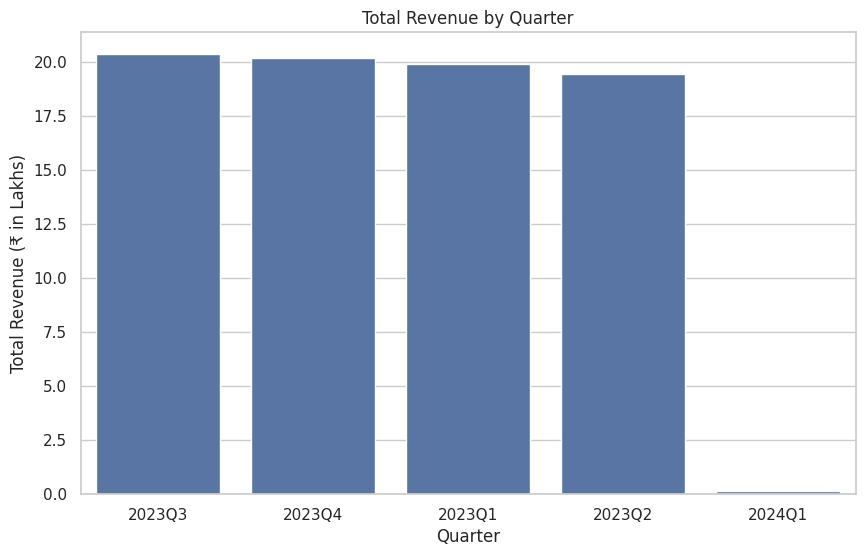

In [50]:
# Convert revenue to Lakhs
quarterly_revenue_lakhs = quarterly_revenue / 1e5

sns.barplot(
    x=quarterly_revenue_lakhs.index.astype(str),
    y=quarterly_revenue_lakhs.values
)

plt.title("Total Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue (₹ in Lakhs)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [51]:
display(Markdown(f"""
### Answer
The quarter with the highest total revenue is: **{quarterly_revenue.idxmax()}**
"""))


### Answer
The quarter with the highest total revenue is: **2023Q3**


## Gold Membership Order Analysis

This section answers questions related to **order volumes**
for Gold members overall and within the top-performing city.

In [52]:
# Total orders by Gold members
total_gold_orders = gold_orders_df['order_id'].nunique()
total_gold_orders

4987

In [53]:
# Identify top revenue city among Gold members
top_gold_city = gold_city_revenue.idxmax()

# Orders in top revenue city (Gold only)
gold_orders_top_city = gold_orders_df[
    gold_orders_df['city'] == top_gold_city
]['order_id'].nunique()

gold_orders_top_city

1337

In [54]:
display(Markdown(f"""
### Answer
- Total orders placed by Gold members: **{total_gold_orders}**
- Orders placed in the top Gold revenue city ({ top_gold_city }): **{gold_orders_top_city}**
"""))


### Answer
- Total orders placed by Gold members: **4987**
- Orders placed in the top Gold revenue city (Chennai): **1337**


## City, User, and Rating-Based Metrics

This section answers revenue, user participation,
and high-rating order volume questions.

In [55]:
# Total revenue from Hyderabad
hyderabad_revenue = final_df[
    final_df['city'].str.lower() == 'hyderabad'
]['total_amount'].sum()

round(hyderabad_revenue)

1889367

In [56]:
# Number of distinct users with at least one order
distinct_users = final_df['user_id'].nunique()
distinct_users

2883

In [57]:
# Orders placed for restaurants with rating >= 4.5
high_rating_orders = final_df[
    final_df['rating'] >= 4.5
]['order_id'].nunique()

high_rating_orders

3374

In [58]:
display(Markdown(f"""
### Answer
- Total revenue from Hyderabad (₹): **{round(hyderabad_revenue)}**
- Distinct users with at least one order: **{distinct_users}**
- Orders placed for restaurants with rating ≥ 4.5: **{high_rating_orders}**
"""))


### Answer
- Total revenue from Hyderabad (₹): **1889367**
- Distinct users with at least one order: **2883**
- Orders placed for restaurants with rating ≥ 4.5: **3374**


## Gold Member AOV & Dataset Conceptual Questions

This section covers:
- Average order value calculations
- Conceptual questions related to dataset joins and structure

In [59]:
# Average order value for Gold members
gold_aov = round(gold_orders_df['total_amount'].mean(), 2)
gold_aov

np.float64(797.15)

In [60]:
display(Markdown(f"""
### Quantitative Answer
- Average order value for Gold members: **₹{gold_aov}**
"""))


### Quantitative Answer
- Average order value for Gold members: **₹797.15**


In [62]:
from IPython.display import Markdown, display

display(Markdown(f"""
# Executive Summary — Food Delivery Analytics

This notebook analyzes customer behavior, restaurant performance, and revenue trends
using transactional order data enriched with user membership and restaurant attributes.

---

## Key Business Insights
- **Top Gold Revenue City:** **{top_gold_city}**
- **Highest Revenue Quarter:** **{quarterly_revenue.idxmax()}**
- **Highest AOV Cuisine:** **{cuisine_aov.idxmax()}**
- **Top Membership–Cuisine Combination:** **{membership_cuisine_revenue.idxmax()}**

---

## Customer Behavior Insights
- **Gold Member Order Share:** **{gold_order_percentage}%**
- **Total Orders by Gold Members:** **{total_gold_orders}**
- **Distinct Active Users:** **{distinct_users}**
- **Gold Member AOV:** **₹{gold_aov}**

---

## Restaurant & Quality Insights
- **Rating Range Generating Highest Revenue:** **{rating_revenue.idxmax()}**
- **Highest AOV (Low-Volume Restaurant):** **{top_low_volume_restaurant.index[0][1]}**
- **High-Rating Orders (≥ 4.5):** **{high_rating_orders}**

---

## City Performance Snapshot
- **Total Revenue from Hyderabad:** **₹{round(hyderabad_revenue)}**
- **Orders in Top Gold City:** **{gold_orders_top_city}**

---

## Strategic Takeaways
- Gold members drive **disproportionately high revenue and order value**
- High-rated restaurants significantly impact revenue concentration
- Certain cuisines deliver strong returns despite limited restaurant presence
- Seasonal revenue peaks suggest targeted promotional opportunities

---

"""))


# Executive Summary — Food Delivery Analytics

This notebook analyzes customer behavior, restaurant performance, and revenue trends
using transactional order data enriched with user membership and restaurant attributes.

---

## Key Business Insights
- **Top Gold Revenue City:** **Chennai**
- **Highest Revenue Quarter:** **2023Q3**
- **Highest AOV Cuisine:** **Mexican**
- **Top Membership–Cuisine Combination:** **('Regular', 'Mexican')**

---

## Customer Behavior Insights
- **Gold Member Order Share:** **50%**
- **Total Orders by Gold Members:** **4987**
- **Distinct Active Users:** **2883**
- **Gold Member AOV:** **₹797.15**

---

## Restaurant & Quality Insights
- **Rating Range Generating Highest Revenue:** **4.6 – 5.0**
- **Highest AOV (Low-Volume Restaurant):** **Hotel Dhaba Multicuisine**
- **High-Rating Orders (≥ 4.5):** **3374**

---

## City Performance Snapshot
- **Total Revenue from Hyderabad:** **₹1889367**
- **Orders in Top Gold City:** **1337**

---

## Strategic Takeaways
- Gold members drive **disproportionately high revenue and order value**
- High-rated restaurants significantly impact revenue concentration
- Certain cuisines deliver strong returns despite limited restaurant presence
- Seasonal revenue peaks suggest targeted promotional opportunities

---

